In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('spotify-2023.csv', encoding = 'iso-8859-1')

In [5]:
df.head()

,Unnamed: 0,STT,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,1,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,...,125,B,Major,80,89,83,31,0,8,4
1,1,2,LALA,Myke Towers,1,2023,3,23,1474,48,...,92,C#,Major,71,61,74,7,0,10,4
2,2,3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,...,138,F,Major,51,32,53,17,0,31,6
3,3,4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,...,170,A,Major,55,58,72,11,0,11,15
4,4,5,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,...,144,A,Minor,65,23,80,14,63,11,6


In [129]:
df.tail()

,Unnamed: 0,STT,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
939,948,949,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,...,144,A,Major,60,24,39,57,0,8,3
940,949,950,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,...,166,F#,Major,42,7,24,83,1,12,6
941,950,951,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,...,92,C#,Major,80,81,67,4,0,8,6
942,951,952,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,...,97,C#,Major,82,67,77,8,0,12,5
943,952,953,Alone,Burna Boy,1,2022,11,4,782,2,...,90,E,Minor,61,32,67,15,0,11,5


In [38]:
df.shape

(953, 25)

In [39]:
df.columns

Index(['STT', 'track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [40]:
df['track_name']

0      Seven (feat. Latto) (Explicit Ver.)
1                                     LALA
2                                  vampire
3                             Cruel Summer
4                           WHERE SHE GOES
                      ...                 
948                           My Mind & Me
949              Bigger Than The Whole Sky
950                   A Veces (feat. Feid)
951                          En La De Ella
952                                  Alone
Name: track_name, Length: 953, dtype: object

In [41]:
df['key'].value_counts()

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

In [42]:
df['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                 34
The Weeknd                   22
Bad Bunny                    19
SZA                          19
Harry Styles                 17
                             ..
Karol G, Ovy On The Drums     1
Coolio, L.V.                  1
Kordhell                      1
Kenia OS                      1
Feid, Sech, Jhayco            1
Name: count, Length: 643, dtype: int64

<h3> Xử lý giá trị null <h3>

In [43]:
df.isnull().sum()

STT                      0
track_name               4
artist(s)_name           5
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [44]:
df['in_shazam_charts'].value_counts()

in_shazam_charts
0      344
1       73
2       35
3       21
4       19
      ... 
115      1
230      1
169      1
529      1
95       1
Name: count, Length: 198, dtype: int64

In [45]:
#thay các giá trị null của in_shazam_chars key thành 0
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)
df['in_shazam_charts']

0      826
1      382
2      949
3      548
4      425
      ... 
948      0
949      0
950      0
951      0
952      0
Name: in_shazam_charts, Length: 953, dtype: object

In [46]:
df['in_shazam_charts'].isnull().sum()

0

In [47]:
#thay các giá trị null của cột key thành C#
df['key'] = df['key'].fillna('C#')
df['key']

0       B
1      C#
2       F
3       A
4       A
       ..
948     A
949    F#
950    C#
951    C#
952     E
Name: key, Length: 953, dtype: object

In [48]:
df['key'].isnull().sum()

0

In [49]:
df = df.dropna(subset=['track_name'])
df = df.dropna(subset=['artist(s)_name'])
df.to_csv('spotify-2023.csv')

In [17]:
#kiểm tra null
df.isnull().sum()

STT                     0
track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

<h3> GIẢM CHIỀU DỮ LIỆU <h3>

In [8]:
year = df['released_year'].value_counts(ascending = False)
before2010 = year[year <=7]
before2010

released_year
2010    7
2002    6
1999    5
1984    4
2000    4
2004    4
1963    3
1958    3
1995    2
1970    2
1959    2
1985    2
1957    2
1986    2
2003    2
1991    2
2008    2
1975    2
1982    2
1946    1
2005    1
1942    1
1996    1
1998    1
1950    1
1979    1
2007    1
1952    1
1971    1
1994    1
1930    1
1973    1
1997    1
1968    1
1992    1
1983    1
1987    1
Name: count, dtype: int64

In [9]:
df['released_year'] = df['released_year'].apply(lambda x: 'Before 2010' if x in before2010 else x)
df

,Unnamed: 0,STT,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,1,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,...,125,B,Major,80,89,83,31,0,8,4
1,1,2,LALA,Myke Towers,1,2023,3,23,1474,48,...,92,C#,Major,71,61,74,7,0,10,4
2,2,3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,...,138,F,Major,51,32,53,17,0,31,6
3,3,4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,...,170,A,Major,55,58,72,11,0,11,15
4,4,5,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,948,949,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,...,144,A,Major,60,24,39,57,0,8,3
940,949,950,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,...,166,F#,Major,42,7,24,83,1,12,6
941,950,951,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,...,92,C#,Major,80,81,67,4,0,8,6
942,951,952,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,...,97,C#,Major,82,67,77,8,0,12,5


In [10]:
df['released_year'].value_counts()

released_year
2022           400
2023           171
2021           118
Before 2010     76
2019            36
2020            36
2017            22
2016            18
2013            13
2014            13
2015            11
2018            10
2012            10
2011            10
Name: count, dtype: int64

<h3>XỬ LÝ DỮ LIỆU CỘT STREAMS <h3>

In [62]:
# Chuyển đổi cột "streams" sang kiểu chuỗi
df['streams'] = df['streams'].astype(str)

# Loại bỏ dấu phẩy từ chuỗi
df['streams'] = df['streams'].str.replace(',', '')

# Chuyển đổi thành số thực
df['streams'] = df['streams'].astype(float)

<h3>TRỰC QUAN HÓA DỮ LIỆU<h3>

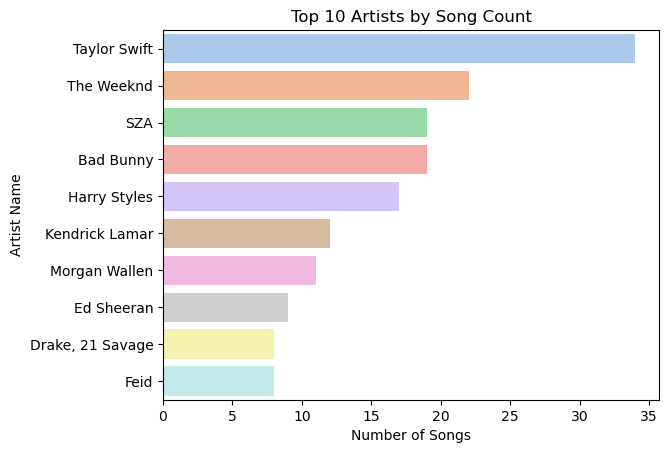

In [53]:
#Top 10 Artists by Song count
top_artists= df.groupby("artist(s)_name").count().sort_values(by='track_name', ascending=False)['track_name'][:10]
sns.barplot(x=top_artists.values, y=top_artists.index, palette='pastel')
plt.title('Top 10 Artists by Song Count')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()

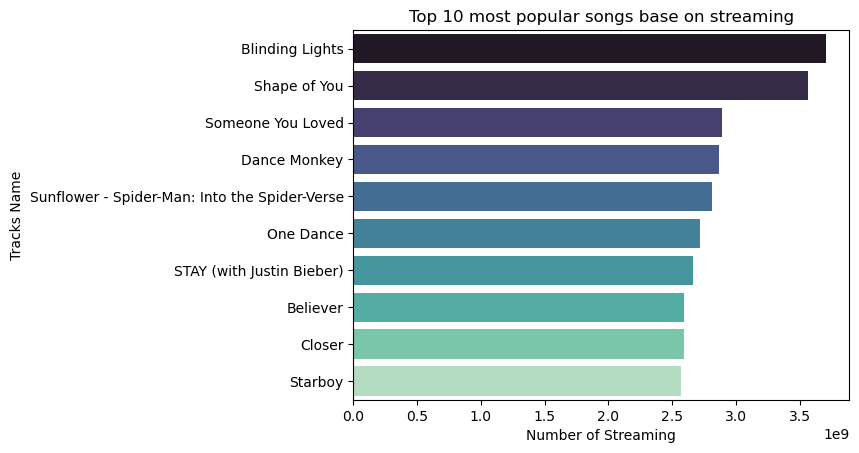

In [111]:
# Top 10 most popular songs base on streaming
top_10_songs = df.sort_values(by ='streams', ascending=False).head(10)
sns.barplot(x='streams', y='track_name', data=top_10_songs, palette='mako')
plt.title('Top 10 most popular songs base on streaming')
plt.xlabel('Number of Streaming')
plt.ylabel('Tracks Name')
plt.show()

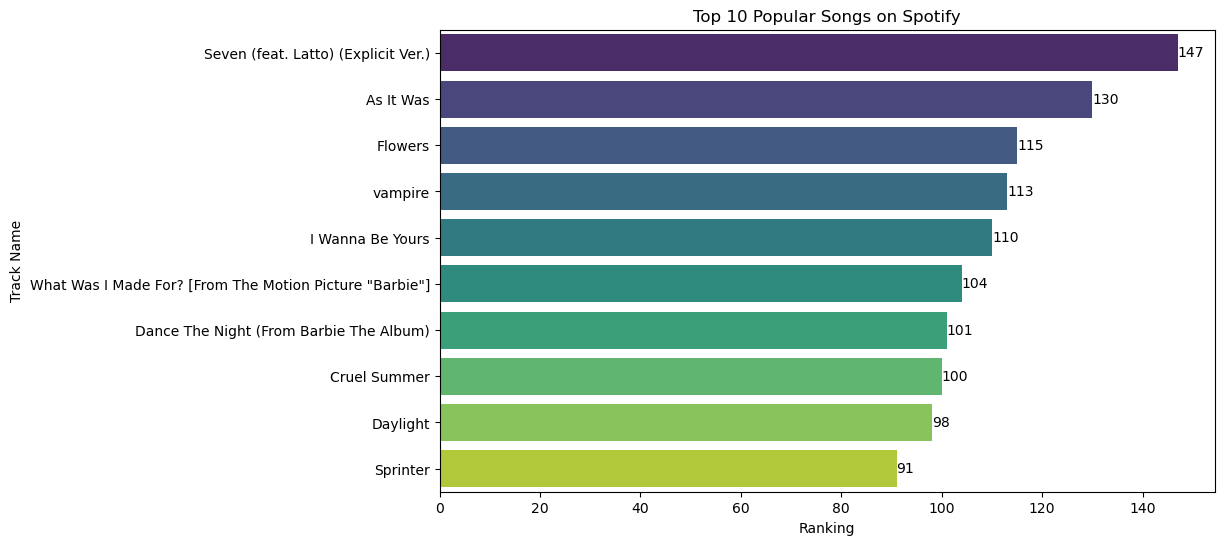

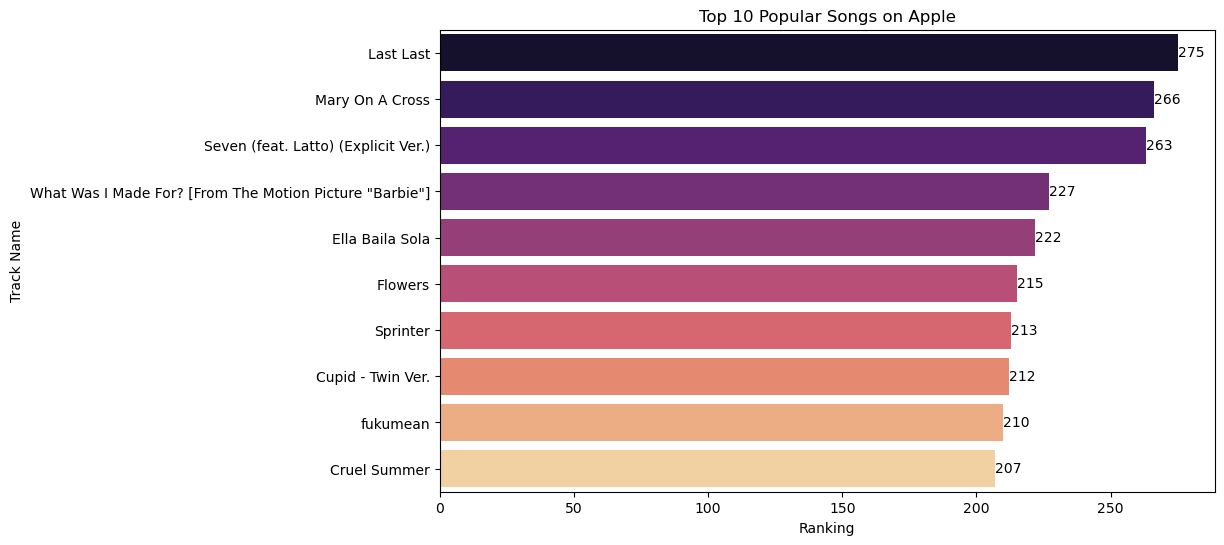

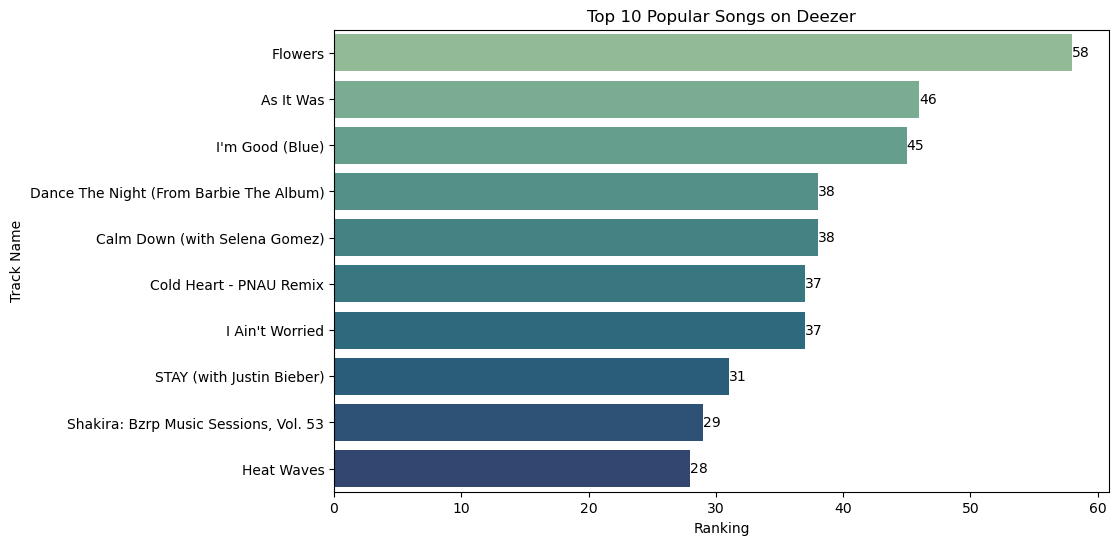

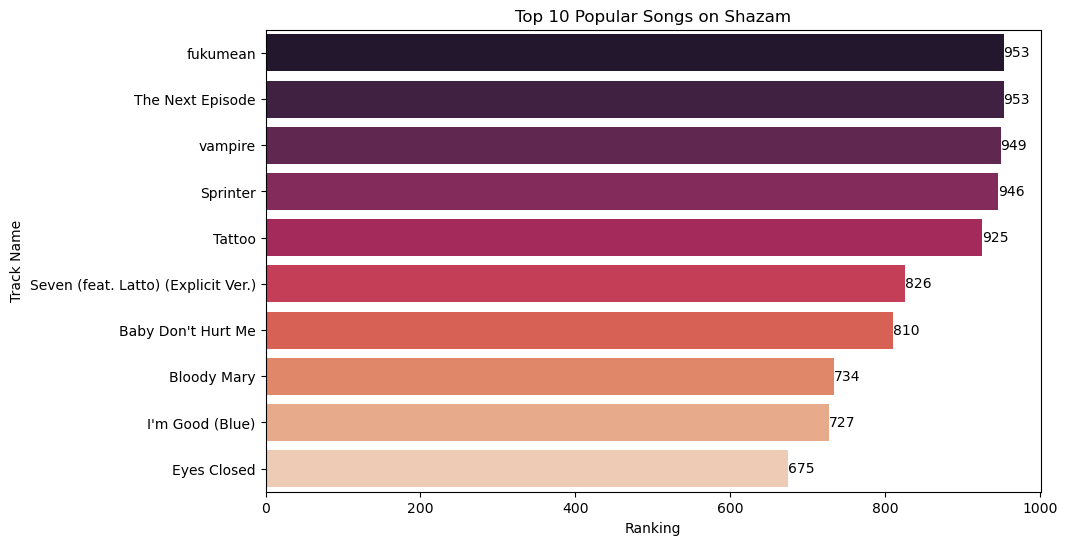

In [110]:
# Top 10 most popular songs in spotify
top_10_sp = df.sort_values(by ='in_spotify_charts', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='in_spotify_charts', y='track_name', data=top_10_sp, palette='viridis')
#hien thi du lieu
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', ha='left', va='center')
    
plt.title('Top 10 Popular Songs on Spotify')
plt.xlabel('Ranking')
plt.ylabel('Track Name')
plt.show()

# Top 10 most popular songs in apple
top_10_ap = df.sort_values(by ='in_apple_charts', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='in_apple_charts', y='track_name', data=top_10_ap, palette='magma')
#hien thi du lieu
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', ha='left', va='center')
    
plt.title('Top 10 Popular Songs on Apple')
plt.xlabel('Ranking')
plt.ylabel('Track Name')
plt.show()

# Top 10 most popular songs in deezer
top_10_dz = df.sort_values(by ='in_deezer_charts', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='in_deezer_charts', y='track_name', data=top_10_dz, palette='crest')
#hien thi du lieu
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', ha='left', va='center')
    
plt.title('Top 10 Popular Songs on Deezer')
plt.xlabel('Ranking')
plt.ylabel('Track Name')
plt.show()

# Top 10 most popular songs in shazam
top_10_sz = df.sort_values(by ='in_shazam_charts', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='in_shazam_charts', y='track_name', data=top_10_sz, palette='rocket')
#hien thi du lieu
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', ha='left', va='center')
    
plt.title('Top 10 Popular Songs on Shazam')
plt.xlabel('Ranking')
plt.ylabel('Track Name')
plt.show()

<p>Dựa trên dữ liệu thu thập được từ các nền tảng Spotify, Apple Music, Deezer và Shazam, có thể thấy rõ sự khác biệt về sở thích âm nhạc của người dùng trên mỗi nền tảng.

Về mức độ phổ biến của bài hát:

Spotify: Có sự kết hợp giữa các bài hát mới và cũ trong top 10.
Apple Music: Có xu hướng ưa chuộng các bài hát mới hơn.
Deezer: Có sự kết hợp giữa các bài hát mới và cũ trong top 10.
Shazam: Tập trung vào các bài hát thịnh hành nhất trong thời gian ngắn.


Nhìn chung, có thể kết luận rằng sở thích âm nhạc của người dùng trên các nền tảng nghe nhạc trực tuyến có sự khác biệt rõ rệt. Mỗi nền tảng có vẻ thu hút đối tượng người dùng với sở thích âm nhạc riêng biệt


<p>

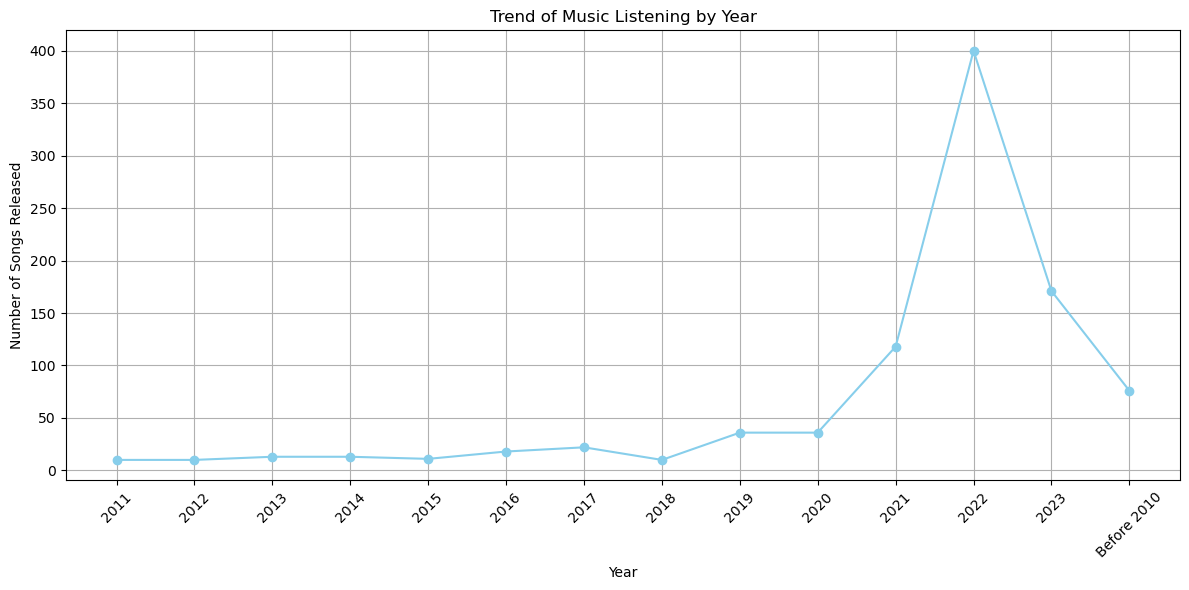

In [15]:
#Xu hướng nghe nhạc theo năm phát hành

#chuyển đổi kiểu dữ liệu sang 
df['released_year'] = df['released_year'].astype(str)
song_count_by_year = df['released_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(song_count_by_year.index, song_count_by_year.values, marker='o', color='skyblue', linestyle='-')
plt.title('Trend of Music Listening by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

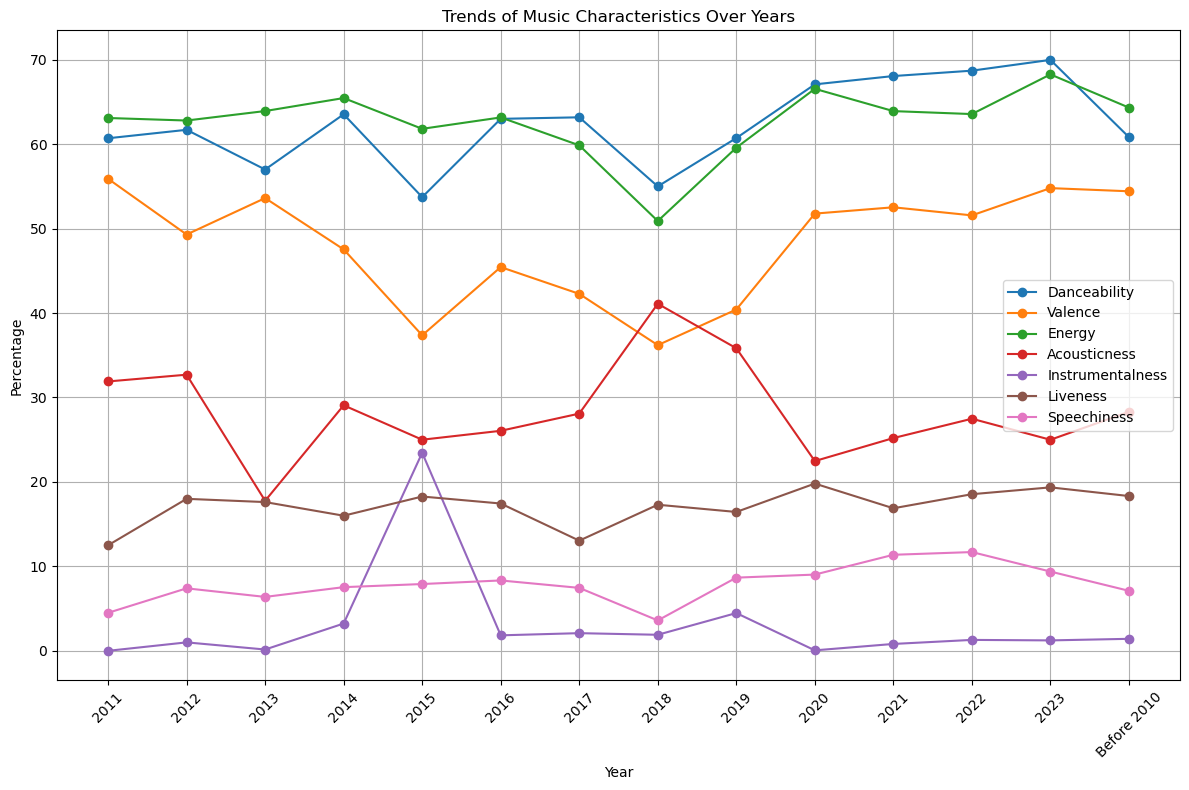

In [143]:
#Sự thay đổi của các thành tố âm nhạc qua từng năm

# Tính toán trung bình của các thành tố âm nhạc theo năm
mean_danceability = df.groupby('released_year')['danceability_%'].mean()
mean_valence = df.groupby('released_year')['valence_%'].mean()
mean_energy = df.groupby('released_year')['energy_%'].mean()
mean_acousticness = df.groupby('released_year')['acousticness_%'].mean()
mean_instrumentalness = df.groupby('released_year')['instrumentalness_%'].mean()
mean_liveness = df.groupby('released_year')['liveness_%'].mean()
mean_speechiness = df.groupby('released_year')['speechiness_%'].mean()

# Vẽ biểu đồ line plot
plt.figure(figsize=(12, 8))

plt.plot(mean_danceability.index, mean_danceability.values, label='Danceability', marker='o')
plt.plot(mean_valence.index, mean_valence.values, label='Valence', marker='o')
plt.plot(mean_energy.index, mean_energy.values, label='Energy', marker='o')
plt.plot(mean_acousticness.index, mean_acousticness.values, label='Acousticness', marker='o')
plt.plot(mean_instrumentalness.index, mean_instrumentalness.values, label='Instrumentalness', marker='o')
plt.plot(mean_liveness.index, mean_liveness.values, label='Liveness', marker='o')
plt.plot(mean_speechiness.index, mean_speechiness.values, label='Speechiness', marker='o')

plt.title('Trends of Music Characteristics Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

<p>Danceability: Xu hướng chung là tăng dần từ năm 2011 đến năm 2023. Điều này cho thấy âm nhạc ngày càng trở nên sôi động và phù hợp để khiêu vũ hơn.
    
Valence: Xu hướng chung là giảm dần từ năm 2011 đến năm 2023. Điều này cho thấy âm nhạc ngày càng nhiều cảm xúc hơn.

Energy: Xu hướng chung là tăng dần từ năm 2011 đến năm 2023. Điều này cho thấy âm nhạc ngày càng trở nên sôi động và tràn đầy năng lượng hơn.

Acousticness: Xu hướng chung là giảm dần từ năm 2011 đến năm 2023. Điều này cho thấy âm nhạc ngày càng sử dụng nhạc cụ điện tử nhiều hơn so với nhạc cụ âm thanh tự nhiên.

Instrumentalness: Xu hướng chung là giảm dần từ năm 2011 đến năm 2023. Điều này cho thấy âm nhạc ngày càng tập trung vào lời ca nhiều hơn so với nhạc cụ.

Liveness: Xu hướng chung là giảm dần từ năm 2011 đến năm 2023. Điều này cho thấy âm nhạc ngày càng được sản xuất trong phòng thu nhiều hơn so với âm nhạc được biểu diễn trực tiếp.

Speechiness: Xu hướng chung là tăng dần từ năm 2011 đến năm 2023. Điều này cho thấy âm nhạc ngày càng tập trung vào lời ca nhiều hơn so với nhạc cụ.<p>

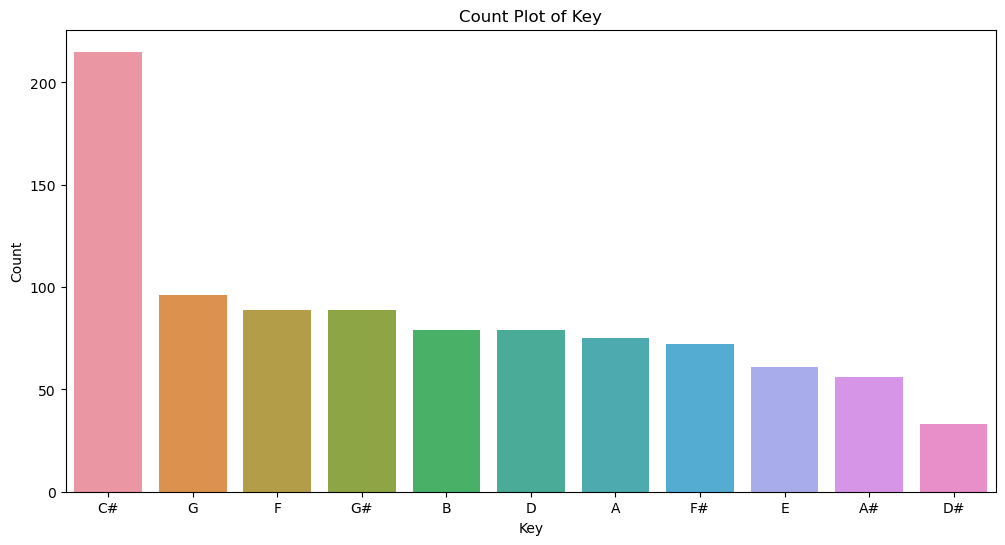

In [144]:
# Count Plot for Key:
plt.figure(figsize=(12, 6))
sns.countplot(x='key', data=df, order=df['key'].value_counts().index)
plt.title('Count Plot of Key')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            944 non-null    int64 
 1   STT                   944 non-null    int64 
 2   track_name            944 non-null    object
 3   artist(s)_name        944 non-null    object
 4   artist_count          944 non-null    int64 
 5   released_year         944 non-null    int64 
 6   released_month        944 non-null    int64 
 7   released_day          944 non-null    int64 
 8   in_spotify_playlists  944 non-null    int64 
 9   in_spotify_charts     944 non-null    int64 
 10  streams               944 non-null    object
 11  in_apple_playlists    944 non-null    int64 
 12  in_apple_charts       944 non-null    int64 
 13  in_deezer_playlists   944 non-null    object
 14  in_deezer_charts      944 non-null    int64 
 15  in_shazam_charts      944 non-null    ob

<h1>========================NHÁP========================<h1>

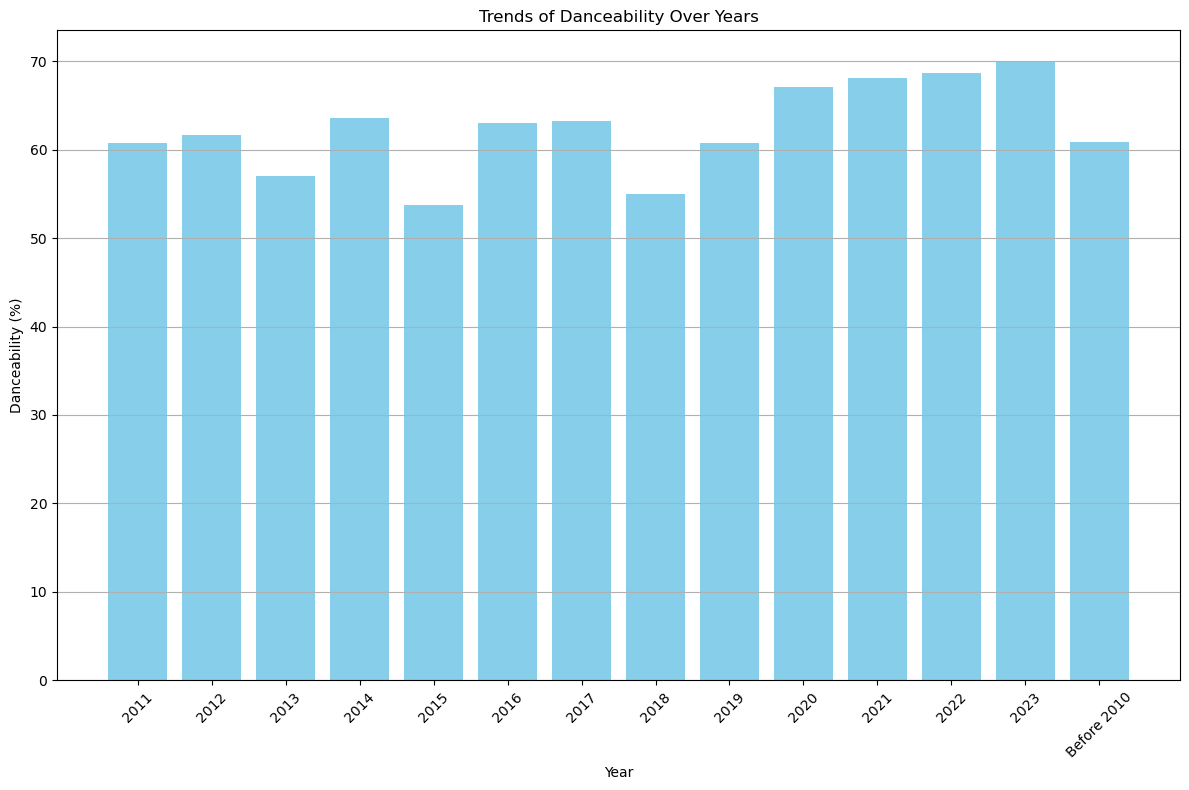

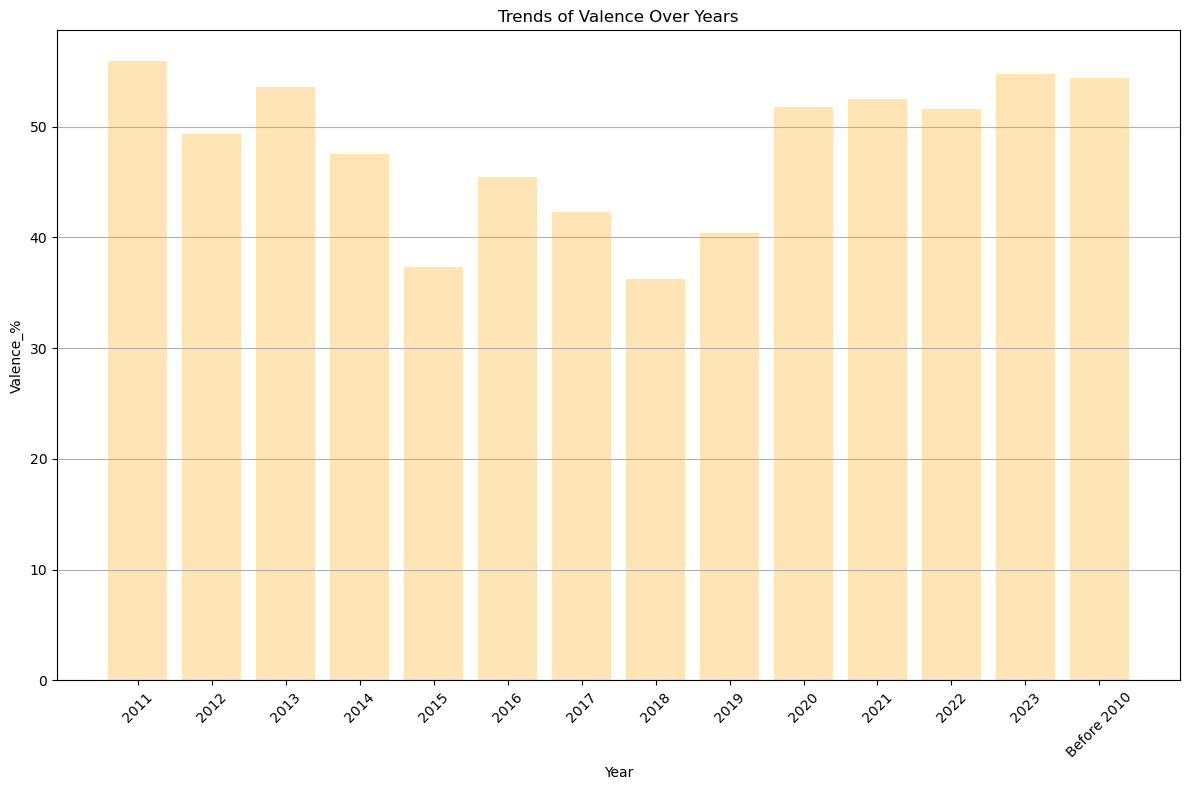

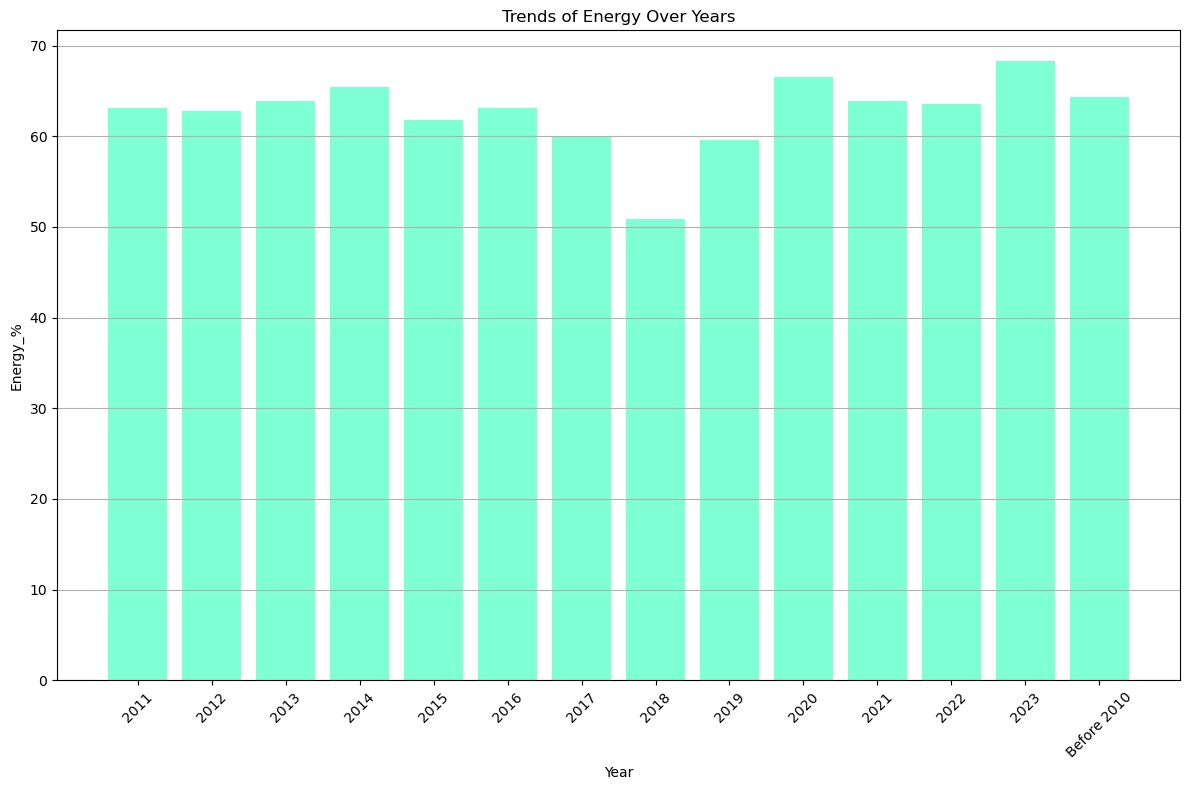

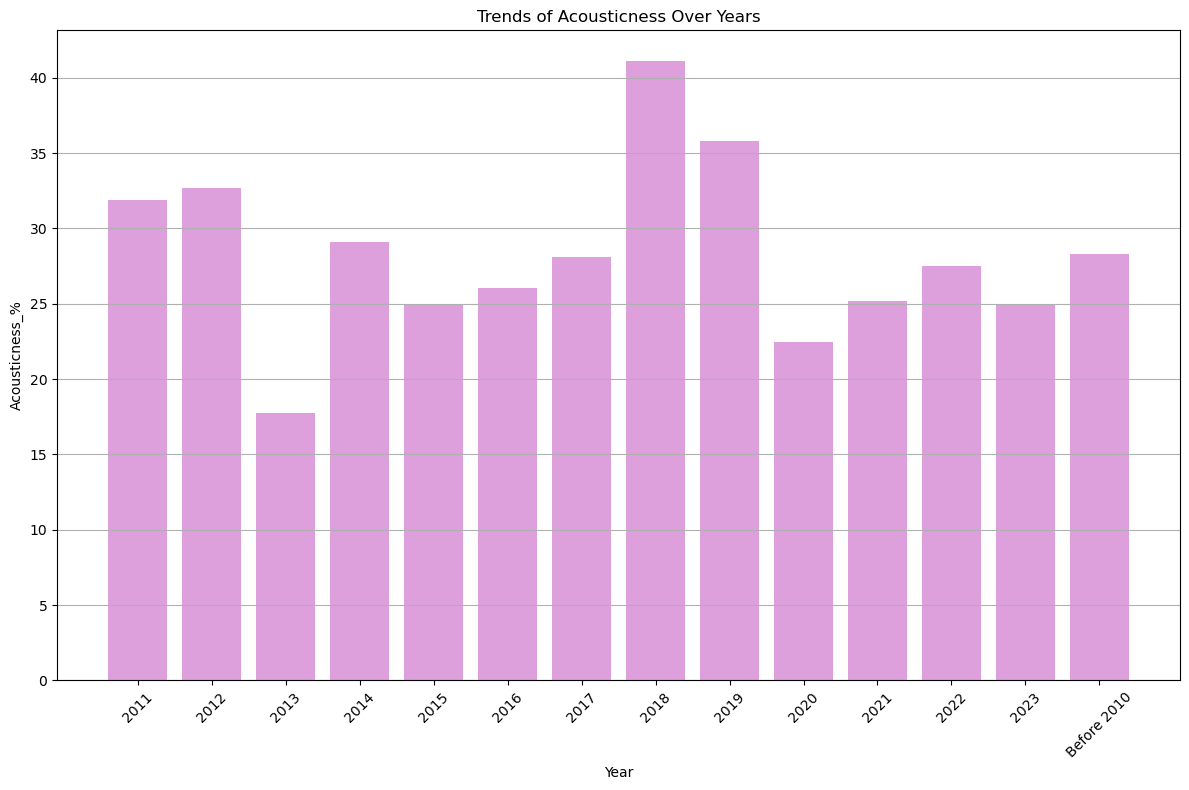

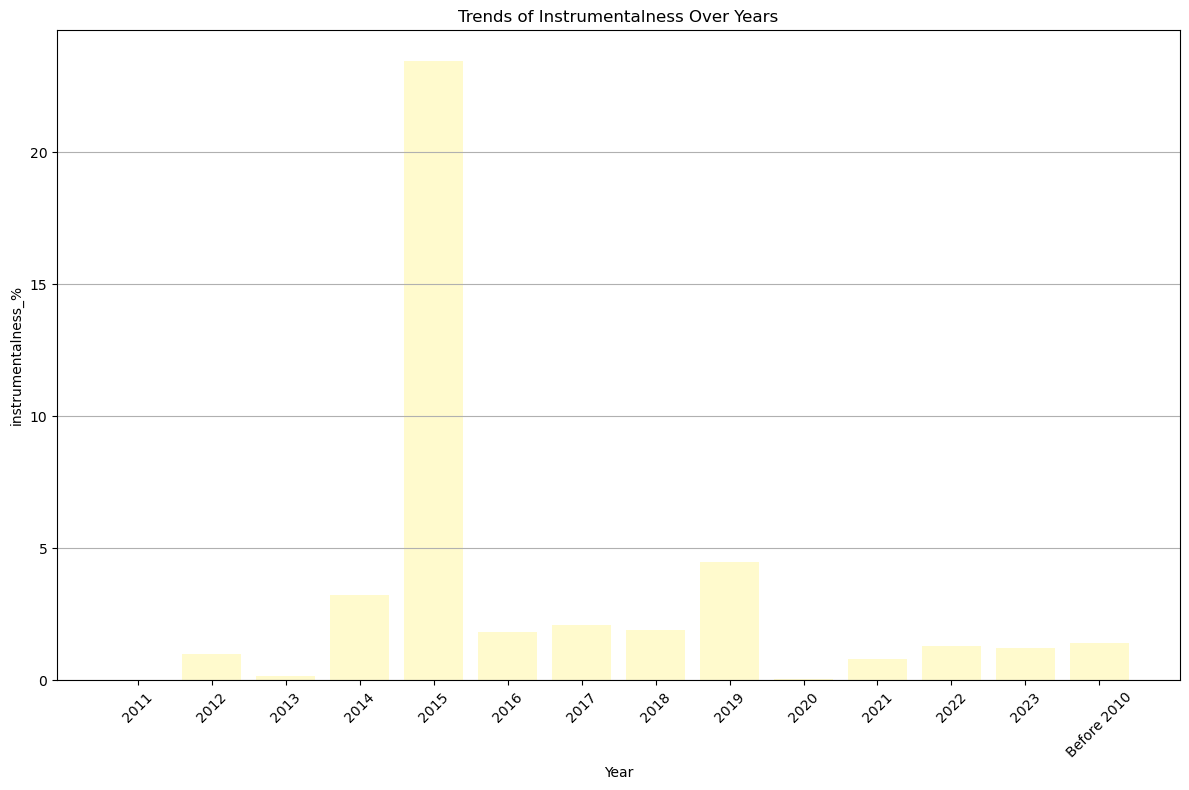

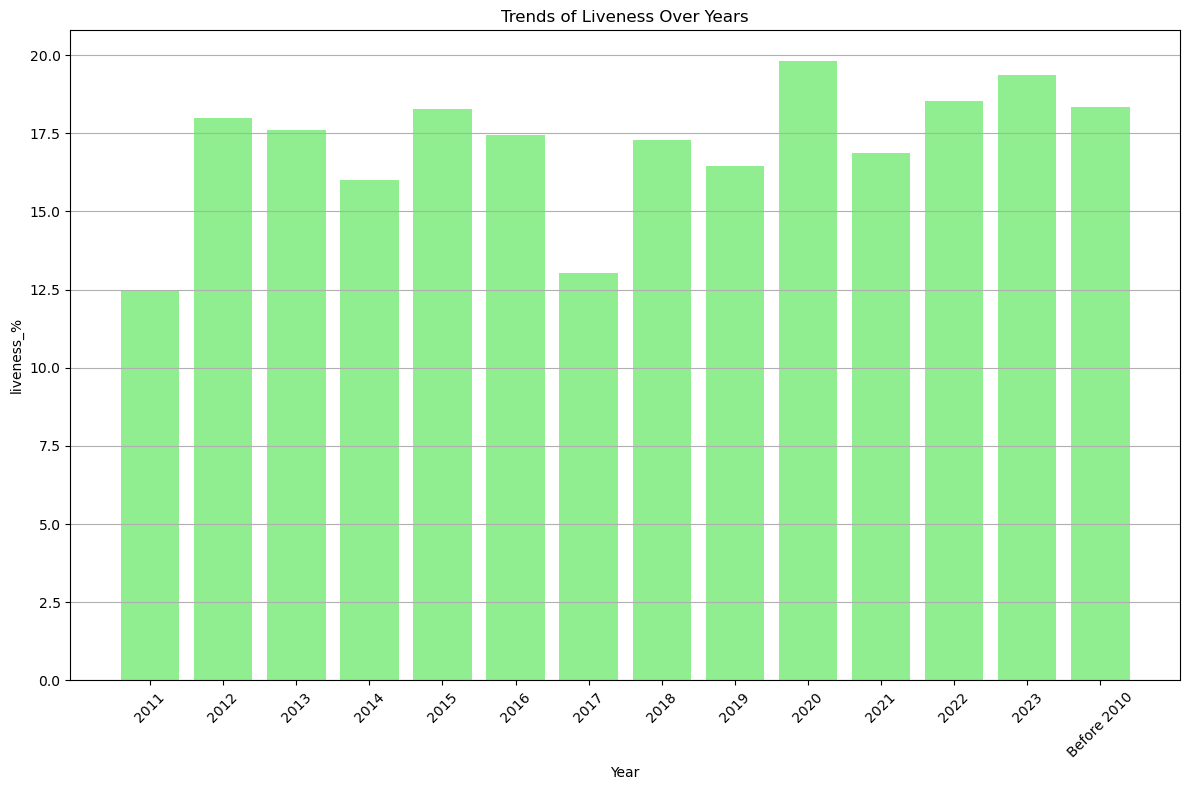

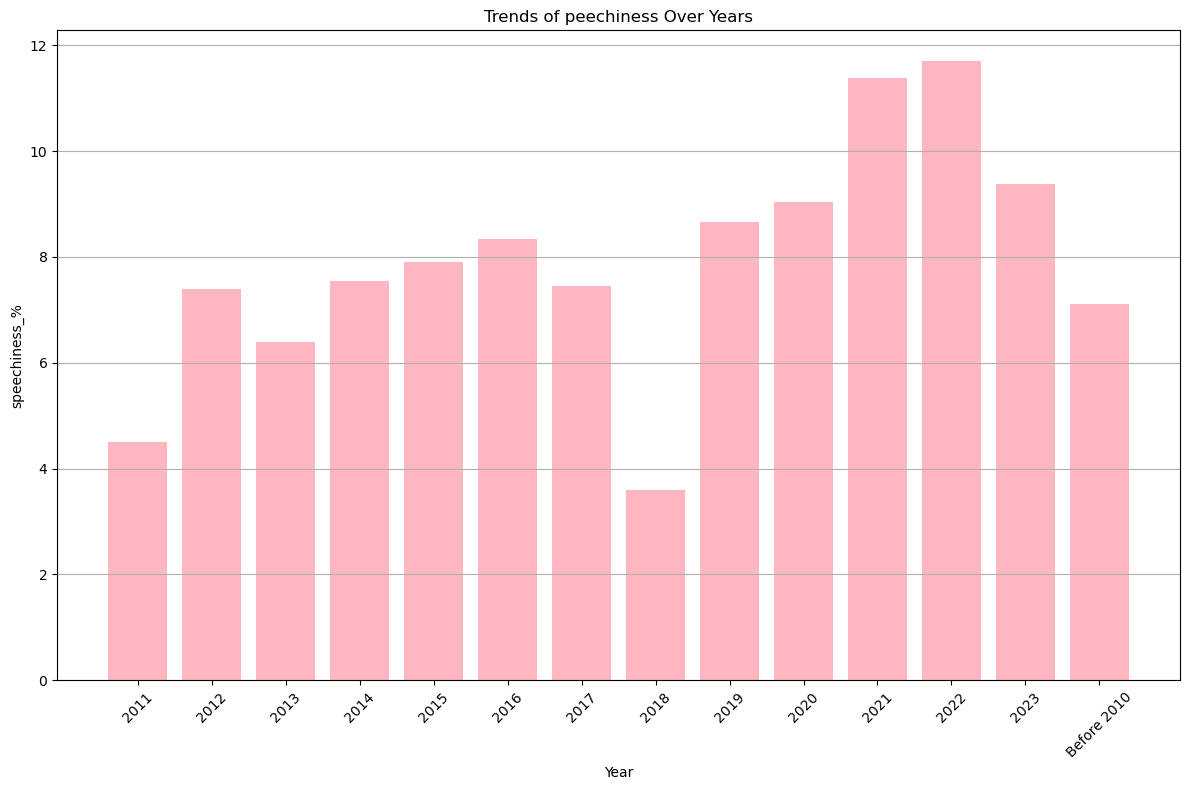

In [23]:
#các thành tố âm nhạc có trong bài hát (acoustic, dance,...) qua từng năm.

# Tính toán trung bình của danceability theo năm
mean_danceability = df.groupby('released_year')['danceability_%'].mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))

plt.bar(mean_danceability.index, mean_danceability.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Danceability (%)')
plt.title('Trends of Danceability Over Years')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

# Tính toán trung bình của Valence theo năm
mean_danceability = df.groupby('released_year')['valence_%'].mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))

plt.bar(mean_danceability.index, mean_danceability.values, color='moccasin')
plt.xlabel('Year')
plt.ylabel('Valence_%')
plt.title('Trends of Valence Over Years')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


# Tính toán trung bình của Energy theo năm
mean_danceability = df.groupby('released_year')['energy_%'].mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))

plt.bar(mean_danceability.index, mean_danceability.values, color='aquamarine')
plt.xlabel('Year')
plt.ylabel('Energy_%')
plt.title('Trends of Energy Over Years')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

# Tính toán trung bình của Acousticness theo năm
mean_danceability = df.groupby('released_year')['acousticness_%'].mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))

plt.bar(mean_danceability.index, mean_danceability.values, color='plum')
plt.xlabel('Year')
plt.ylabel('Acousticness_%')
plt.title('Trends of Acousticness Over Years')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

# Tính toán trung bình của instrumentalness theo năm
mean_danceability = df.groupby('released_year')['instrumentalness_%'].mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))

plt.bar(mean_danceability.index, mean_danceability.values, color='lemonchiffon')
plt.xlabel('Year')
plt.ylabel('instrumentalness_%')
plt.title('Trends of Instrumentalness Over Years')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


# Tính toán trung bình của Liveness_% theo năm
mean_danceability = df.groupby('released_year')['liveness_%'].mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))

plt.bar(mean_danceability.index, mean_danceability.values, color='lightgreen')
plt.xlabel('Year')
plt.ylabel('liveness_%')
plt.title('Trends of Liveness Over Years')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


# Tính toán trung bình của speechiness_% theo năm
mean_danceability = df.groupby('released_year')['speechiness_%'].mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))

plt.bar(mean_danceability.index, mean_danceability.values, color='lightpink')
plt.xlabel('Year')
plt.ylabel('speechiness_%')
plt.title('Trends of peechiness Over Years')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()